In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class FFN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN):
        super().__init__()
        activation = nn.Tanh
        self.ffni = nn.Sequential(nn.Linear(N_INPUT, N_HIDDEN), activation())
        self.ffnh = nn.Sequential(nn.Linear(N_HIDDEN, N_HIDDEN), activation())
        self.ffne = nn.Sequential(nn.Linear(N_HIDDEN, N_OUTPUT))

    def forward(self, x):
        x = self.ffni(x)
        x = self.ffnh(x)
        x = self.ffnh(x)
        x = self.ffnh(x)
        x = self.ffne(x)
        return x

(620,)
(620,)


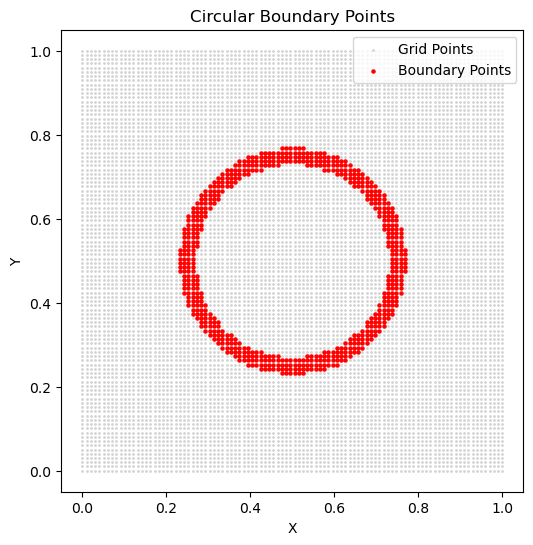

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx, Ly = 1, 1  # Grid dimensions
Nx, Ny = 100, 100  # Number of grid points
radius = 0.25       # Radius of the circle
center_x, center_y = Lx / 2, Ly / 2  # Center of the circle

# Generate grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Circle equation: (x - center_x)^2 + (y - center_y)^2 = radius^2
distance_squared = (X - center_x)**2 + (Y - center_y)**2
boundary_mask = np.isclose(distance_squared, radius**2, atol=1e-2)  # Tolerance for floating-point comparison

# Extract boundary points
boundary_x = X[boundary_mask]
boundary_y = Y[boundary_mask]

print(boundary_x.shape)
print(boundary_y.shape)
# Plot the grid and boundary points
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, color='lightgray', s=1, label='Grid Points')
plt.scatter(boundary_x, boundary_y, color='red', s=5, label='Boundary Points')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Circular Boundary Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [4]:
# import numpy as np
# import torch

# # Parameters
# Lx, Ly = 1, 1  # Grid dimensions
# Nx, Ny = 100, 100  # Number of grid points
# radius = 0.25       # Radius of the circle
# center_x, center_y = Lx / 2, Ly / 2  # Center of the circle
# t_max = 3
# Nt = 11

# # Generate grid
# x = np.linspace(0, Lx, Nx)
# y = np.linspace(0, Ly, Ny)
# X, Y = np.meshgrid(x, y)

# # Calculate distance from the center for all points
# distance_squared = (X - center_x)**2 + (Y - center_y)**2

# # Identify interior and exterior points
# interior_mask = distance_squared < radius**2
# exterior_mask = ~interior_mask

# x_int, y_int = X[interior_mask], Y[interior_mask]
# x_ext, y_ext = X[exterior_mask], Y[exterior_mask]
# # l = x_ext.reshape(-1,1)
# # l_size = l.shape

# x_ext = torch.from_numpy(x_ext)
# y_ext = torch.from_numpy(y_ext)
# l = len(x_ext)
# a, b = x_ext.shape,y_ext.shape
# # # Generate time array
# t = torch.linspace(0, t_max, Nt)
# t_ext = t.tile(a).unsqueeze(1)

# x_ext = x_ext.repeat_interleave(Nt).unsqueeze(1)
# y_ext = y_ext.repeat_interleave(Nt).unsqueeze(1)

# k = torch.cat([x_ext, y_ext, t_ext], dim = 1)
# print(k.shape)  # 8072*11


# ## circular boundary


# boundary_mask = np.isclose(distance_squared, radius**2, atol=1e-3)  # Tolerance for floating-point comparison

# # Extract boundary points
# boundary_x = X[boundary_mask]
# boundary_y = Y[boundary_mask]

# x_boundary = torch.from_numpy(boundary_x)
# y_boundary = torch.from_numpy(boundary_y)
# c = x_boundary.shape

# t_boundary = t.tile(c).unsqueeze(1)

# x_boundary = x_boundary.repeat_interleave(Nt).unsqueeze(1)
# y_boundary = y_boundary.repeat_interleave(Nt).unsqueeze(1)

# k_boundary = torch.cat([x_boundary, y_boundary, t_boundary], dim = 1)
# print(k_boundary.shape)  ## 68*11




# # tame = torch.zeros(a,1)  # size of x_ext
# # initial_condition = (x_ext, y_ext, tame, 0) ## keeping intital temperature (0°C)
# print(l)

In [5]:
# import numpy as np
# import torch

# # Parameters
# Lx, Ly = 1, 1  # Grid dimensions
# Nx, Ny = 100, 100  # Number of grid points
# radius = 0.25       # Radius of the circle
# center_x, center_y = Lx / 2, Ly / 2  # Center of the circle
# t_max = 3
# Nt = 11

# # Generate grid
# x = np.linspace(0, Lx, Nx)
# y = np.linspace(0, Ly, Ny)
# X, Y = np.meshgrid(x, y)

# # Calculate distance from the center for all points
# distance_squared = (X - center_x)**2 + (Y - center_y)**2

# # Identify interior and exterior points
# interior_mask = distance_squared < radius**2
# exterior_mask = ~interior_mask

# x_int, y_int = X[interior_mask], Y[interior_mask]
# x_ext, y_ext = X[exterior_mask], Y[exterior_mask]

# # Convert exterior points to float32 and reshape
# x_ext = torch.tensor(x_ext.flatten(), dtype=torch.float32).unsqueeze(1)
# y_ext = torch.tensor(y_ext.flatten(), dtype=torch.float32).unsqueeze(1)

# t = torch.linspace(0, t_max, Nt, dtype=torch.float32).unsqueeze(1)
# t_ext = t.repeat(len(x_ext), 1)

# x_ext = x_ext.repeat_interleave(Nt, dim=0)
# y_ext = y_ext.repeat_interleave(Nt, dim=0)
# # Generate time array and tile it


# # Concatenate x, y, and t for exterior points
# k = torch.cat([x_ext, y_ext, t_ext], dim=1)
# print(f"Exterior points shape: {k.shape}")  # Should reflect (Nx_ext * Nt, 3)

# # Boundary points
# boundary_mask = np.isclose(distance_squared, radius**2, atol=1e-3)  # Tolerance for floating-point comparison
# boundary_x = X[boundary_mask]
# boundary_y = Y[boundary_mask]

# # Convert boundary points to float32 and reshape
# x_boundary = torch.tensor(boundary_x.flatten(), dtype=torch.float32).unsqueeze(1)
# y_boundary = torch.tensor(boundary_y.flatten(), dtype=torch.float32).unsqueeze(1)

# t_boundary = t.repeat(len(x_boundary), 1)

# x_boundary = x_boundary.repeat_interleave(Nt, dim=0)
# y_boundary = y_boundary.repeat_interleave(Nt, dim=0)

# # Tile time for boundary points
# # t_boundary = t.repeat(len(x_boundary), 1)

# # Concatenate x, y, and t for boundary points
# k_boundary = torch.cat([x_boundary, y_boundary, t_boundary], dim=1)
# print(f"Boundary points shape: {k_boundary.shape}")  # Should reflect (Nb * Nt, 3)


In [6]:
# Generate Domain and Boundary Points
Lx, Ly = 1, 1  # Grid dimensions
Nx, Ny = 100, 100  # Number of grid points
radius = 0.25       # Radius of the circle
center_x, center_y = Lx / 2, Ly / 2  # Center of the circle
t_max = 3
Nt = 11
    
# Interior points
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
# t = np.linspace(0, t_max, Nt)

X, Y = np.meshgrid(x, y)
# Calculate distance from the center for all points
distance_squared = (X - center_x)**2 + (Y - center_y)**2

# Identify interior and exterior points
interior_mask = distance_squared < radius**2
exterior_mask = ~interior_mask

x_int, y_int = X[interior_mask], Y[interior_mask]
x_ext, y_ext = X[exterior_mask], Y[exterior_mask]
# p = x_ext
x_ext = torch.tensor(x_ext.flatten(), dtype=torch.float32).unsqueeze(1)
y_ext = torch.tensor(y_ext.flatten(), dtype=torch.float32).unsqueeze(1)
t = torch.linspace(0, t_max, Nt, dtype=torch.float32).unsqueeze(1)
t_ext = t.repeat(len(x_ext), 1)
# print(t_ext.shape)
x_ext_col = x_ext.repeat_interleave(Nt, dim=0)
y_ext_col = y_ext.repeat_interleave(Nt, dim=0)

# k = torch.cat([x_ext, y_ext, t_ext], dim = 1)

# Generate time array and tile it


# # Generate time array   

# k = torch.cat([x_ext, y_ext, t_ext], dim = 1)

# making of intital time

# same as external grid except the size will be same as of x_ext or y_ext with t = 0 at all coordinates



# Boundary points of coordinates
# Generate spatial (y) and temporal (t) points
y_left = torch.linspace(0, Ly, Ny)  # Ny points along y
t_left = torch.linspace(0, t_max, Nt)  # Nt points in time

# Repeat y for all time steps
y_left = y_left.repeat_interleave(Nt)  # Each y repeated Nt times

# Repeat t for all spatial points
t_left = t_left.tile(Ny)  # Cycle t Ny times

# x remains zero for the left boundary
x_left = torch.zeros_like(y_left)

x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)


#right

# Generate spatial (y) and temporal (t) points
y_right = torch.linspace(0, Ly, Ny)  # Ny points along y
t_right = torch.linspace(0, t_max, Nt)  # Nt points in time

# Repeat y for all time steps
y_right = y_right.repeat_interleave(Nt)  # Each y repeated Nt times

# Repeat t for all spatial points
t_right = t_right.tile(Ny)  # Cycle t Ny times

# x remains zero for the left boundary
x_right = Lx * torch.ones_like(y_right)

x_col_right = torch.tensor(x_right.flatten(), dtype=torch.float32).unsqueeze(1)
y_col_right = torch.tensor(y_right.flatten(), dtype=torch.float32).unsqueeze(1)
t_col_right = torch.tensor(t_right.flatten(), dtype=torch.float32).unsqueeze(1)


# top 

# Generate spatial (y) and temporal (t) points
x_top = torch.linspace(0, Lx, Nx)  # Ny points along y
t_top = torch.linspace(0, t_max, Nt)  # Nt points in time

# Repeat y for all time steps
x_top = x_top.repeat_interleave(Nt)  # Each y repeated Nt times

# Repeat t for all spatial points
t_top = t_top.tile(Nx)  # Cycle t Ny times

# x remains zero for the left boundary
y_top = Ly * torch.ones_like(x_top)

x_col_top = torch.tensor(x_top.flatten(), dtype=torch.float32).unsqueeze(1)
y_col_top = torch.tensor(y_top.flatten(), dtype=torch.float32).unsqueeze(1)
t_col_top = torch.tensor(t_top.flatten(), dtype=torch.float32).unsqueeze(1)


# bottom

# Generate spatial (y) and temporal (t) points
x_bottom = torch.linspace(0, Lx, Nx)  # Ny points along y
t_bottom = torch.linspace(0, t_max, Nt)  # Nt points in time

# Repeat y for all time steps
x_bottom = x_bottom.repeat_interleave(Nt)  # Each y repeated Nt times

# Repeat t for all spatial points
t_bottom = t_bottom.tile(Nx)  # Cycle t Ny times

# x remains zero for the left boundary
y_bottom = torch.zeros_like(x_bottom)

x_col_bottom = torch.tensor(x_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
y_col_bottom = torch.tensor(y_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
t_col_bottom = torch.tensor(t_bottom.flatten(), dtype=torch.float32).unsqueeze(1)

## circular boundary 

boundary_mask = np.isclose(distance_squared, radius**2, atol=1e-2)  # Tolerance for floating-point comparison

# Extract boundary points
boundary_x = X[boundary_mask]
boundary_y = Y[boundary_mask]

x_boundary = torch.tensor(boundary_x.flatten(), dtype=torch.float32).unsqueeze(1)
y_boundary = torch.tensor(boundary_y.flatten(), dtype=torch.float32).unsqueeze(1)

t_boundary = t.repeat(len(x_boundary), 1)

x_boundary = x_boundary.repeat_interleave(Nt, dim=0)
y_boundary = y_boundary.repeat_interleave(Nt, dim=0)


# initial points of time
tame = torch.zeros(len(x_ext),1)  # size of x_ext
initial_condition = (x_ext, y_ext, tame, 0) ## keeping intital temperature (0°C)

boundaries = [
    (x_col_left, y_col_left, t_col_left, 100),     # Left boundary (0°C)
    (x_col_right, y_col_right, t_col_right, 0),   # Right boundary (0°C)
    (x_boundary, y_boundary, t_boundary, 100)  # circular boundary (100°C)
]

new_boundaries = [(x_col_bottom, y_col_bottom, t_col_bottom),
                  (x_col_top, y_col_top, t_col_top)]

# return (x_ext, y_ext, t_ext), boundaries, initial_condition
print(x_ext.shape)

torch.Size([8072, 1])


/tmp/ipykernel_67357/3755993160.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_67357/3755993160.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_67357/3755993160.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_67357/3755993160.py:82: UserWarning: To 

In [7]:
# Generate Domain and Boundary Points
def generate_points(Nx, Ny, Nt, Lx, Ly, t_max):
    
    # Interior points
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    # t = np.linspace(0, t_max, Nt)

    X, Y = np.meshgrid(x, y)
    # Calculate distance from the center for all points
    distance_squared = (X - center_x)**2 + (Y - center_y)**2
    
    # Identify interior and exterior points
    interior_mask = distance_squared < radius**2
    exterior_mask = ~interior_mask
    
    x_int, y_int = X[interior_mask], Y[interior_mask]
    x_ext, y_ext = X[exterior_mask], Y[exterior_mask]
    x_ext = torch.tensor(x_ext.flatten(), dtype=torch.float32).unsqueeze(1)
    # p = x_ext
    y_ext = torch.tensor(y_ext.flatten(), dtype=torch.float32).unsqueeze(1)
    t = torch.linspace(0, t_max, Nt, dtype=torch.float32).unsqueeze(1)
    t_ext = t.repeat(len(x_ext), 1)

    x_ext_col = x_ext.repeat_interleave(Nt, dim=0)
    y_ext_col = y_ext.repeat_interleave(Nt, dim=0)
    
    # Generate time array and tile it

    
    # # Generate time array   

    # k = torch.cat([x_ext, y_ext, t_ext], dim = 1)

    # making of intital time

    # same as external grid except the size will be same as of x_ext or y_ext with t = 0 at all coordinates



    # Boundary points of coordinates
    # Generate spatial (y) and temporal (t) points
    y_left = torch.linspace(0, Ly, Ny)  # Ny points along y
    t_left = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    y_left = y_left.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_left = t_left.tile(Ny)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    x_left = torch.zeros_like(y_left)
    
    x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)
    
    
    #right
    
    # Generate spatial (y) and temporal (t) points
    y_right = torch.linspace(0, Ly, Ny)  # Ny points along y
    t_right = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    y_right = y_right.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_right = t_right.tile(Ny)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    x_right = Lx * torch.ones_like(y_right)
    
    x_col_right = torch.tensor(x_right.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_right = torch.tensor(y_right.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_right = torch.tensor(t_right.flatten(), dtype=torch.float32).unsqueeze(1)
    
    
    # top 
    
    # Generate spatial (y) and temporal (t) points
    x_top = torch.linspace(0, Lx, Nx)  # Ny points along y
    t_top = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    x_top = x_top.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_top = t_top.tile(Nx)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    y_top = Ly * torch.ones_like(x_top)
    
    x_col_top = torch.tensor(x_top.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_top = torch.tensor(y_top.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_top = torch.tensor(t_top.flatten(), dtype=torch.float32).unsqueeze(1)
    
    
    # bottom
    
    # Generate spatial (y) and temporal (t) points
    x_bottom = torch.linspace(0, Lx, Nx)  # Ny points along y
    t_bottom = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    x_bottom = x_bottom.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_bottom = t_bottom.tile(Nx)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    y_bottom = torch.zeros_like(x_bottom)
    
    x_col_bottom = torch.tensor(x_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_bottom = torch.tensor(y_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_bottom = torch.tensor(t_bottom.flatten(), dtype=torch.float32).unsqueeze(1)

    ## circular boundary 

    boundary_mask = np.isclose(distance_squared, radius**2, atol=1e-3)  # Tolerance for floating-point comparison

    # Extract boundary points
    boundary_x = X[boundary_mask]
    boundary_y = Y[boundary_mask]

    x_boundary = torch.tensor(boundary_x.flatten(), dtype=torch.float32).unsqueeze(1)
    y_boundary = torch.tensor(boundary_y.flatten(), dtype=torch.float32).unsqueeze(1)
    
    t_boundary = t.repeat(len(x_boundary), 1)
    
    x_boundary = x_boundary.repeat_interleave(Nt, dim=0)
    y_boundary = y_boundary.repeat_interleave(Nt, dim=0)
    

    # initial points of time
    tame = torch.zeros(len(x_ext),1)  # size of x_ext
    initial_condition = (x_ext, y_ext, tame, 0) ## keeping intital temperature (0°C)

    boundaries = [
        (x_col_left, y_col_left, t_col_left, 100),     # Left boundary (0°C)
        (x_col_right, y_col_right, t_col_right, 100),   # Right boundary (0°C)
        (x_col_bottom, y_col_bottom, t_col_bottom,0),
        (x_col_top, y_col_top, t_col_top,0),
        (x_boundary, y_boundary, t_boundary, 100)  # circular boundary (100°C)
    ]

    # new_boundaries = [(x_col_bottom, y_col_bottom, t_col_bottom),  ## Neumann's Boundary Condition
    #                   (x_col_top, y_col_top, t_col_top)]

    return (x_ext_col, y_ext_col, t_ext), boundaries, initial_condition

In [8]:
# PDE Residual Loss
def pde_residual_loss(model, x, y, t):
    x.requires_grad = True
    y.requires_grad = True
    t.requires_grad = True
    
    T = model(torch.cat([x, y, t], dim=1))  # Neural network prediction T(x, y)
    
    # First derivatives of time
    T_t = torch.autograd.grad(T, t, grad_outputs=torch.ones_like(T), create_graph=True)[0] #dT/dt
    

    # First derivatives wrt x, y
    grad_T = torch.autograd.grad(T, [x, y], grad_outputs=torch.ones_like(T), create_graph=True)
    T_x, T_y = grad_T[0], grad_T[1]  # dT/dx, dT/dy

    # Second derivatives
    T_xx = torch.autograd.grad(T_x, x, grad_outputs=torch.ones_like(T_x), create_graph=True)[0]
    T_yy = torch.autograd.grad(T_y, y, grad_outputs=torch.ones_like(T_y), create_graph=True)[0]

    # Residual of Laplace's equation
    residual = T_t - 0.1*(T_xx + T_yy)  # ∂T/∂t - k(∂²T/∂x² + ∂²T/∂y²)

    loss_residual = torch.mean(residual**2)
    return loss_residual

# Boundary Loss
def boundary_loss(model, x_boundary, y_boundary, time_boundary, T_exact):
    T_pred = model(torch.cat([x_boundary, y_boundary, time_boundary], dim=1)) 
    loss_boundary = torch.mean((T_pred - T_exact)**2)
    return loss_boundary

# def New_boundary_loss(model, x_boundary, y_boundary, time_boundary):    
#     y_boundary.requires_grad = True
    
#     T = model(torch.cat([x_boundary, y_boundary, time_boundary], dim=1))  # Neural network prediction T(x, y)

#     T_y = torch.autograd.grad(T, y_boundary, grad_outputs=torch.ones_like(T), create_graph=True)[0] #dT/dy

#     residual = T_y
#     loss = torch.mean(residual**2)
#     return loss

# def intial_loss(model, x, y):
def initial_loss(model, x_initial, y_initial, t_initial, T_exact):
    T_pred = model(torch.cat([x_initial, y_initial, t_initial], dim = 1))
    loss_initial = torch.mean((T_pred - T_exact)**2)
    return loss_initial
    

# Total Loss Function
def total_loss(model, collocation_points, boundaries, initial_condition):
    # PDE Residual Loss
    x_col, y_col, t_col = collocation_points
    loss_pde = pde_residual_loss(model, x_col, y_col, t_col)

    # Boundary Losses
    loss_boundary = 0
    for boundary in boundaries:
        # boundary = [tensor.float() for tensor in boundary]
        x_b, y_b, t_b, T_exact_val = boundary
        T_exact = T_exact_val * torch.ones_like(x_b)
        loss_boundary += boundary_loss(model, x_b, y_b, t_b, T_exact)

    # new_loss_boundary = 0
    # for neu_boundary in New_boundaries:
    #     x_new_b, y_new_b, t_new_b = neu_boundary        
    #     new_loss_boundary += New_boundary_loss(model, x_new_b, y_new_b, t_new_b)
        
    # Initial loss 
    x_init, y_init, t_init, T_init_val = initial_condition
    T_exact_init = T_init_val * torch.ones_like(x_init)
    loss_initial = initial_loss(model, x_init, y_init, t_init, T_exact_init)
    
    # Combine losses
    total_loss = loss_pde + loss_boundary + loss_initial #+ new_loss_boundary
    return total_loss

In [9]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import torch
import numpy as np

# Plot function
def plot(model, Lx, Ly, Lt, Nx, Ny, Nt):
    radius = 0.25       # Radius of the circle
    center_x, center_y = Lx / 2, Ly / 2  # Center of the circle
    # Generate grid
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    
    # Calculate distance from the center for all points
    distance_squared = (X - center_x)**2 + (Y - center_y)**2
    
    # Identify interior and exterior points
    interior_mask = distance_squared < radius**2
    exterior_mask = ~interior_mask
    
    x_ext, y_ext = X[exterior_mask], Y[exterior_mask]
    x_ext = torch.tensor(x_ext.flatten(), dtype=torch.float32)
    y_ext = torch.tensor(y_ext.flatten(), dtype=torch.float32)
    
    # Generate time array for exterior points
    t = torch.linspace(0, Lt, Nt)
    t_ext = t.repeat(x_ext.shape[0], 1).T.flatten()
    
    # Combine spatial and temporal data
    x_col = x_ext.repeat(Nt)
    y_col = y_ext.repeat(Nt)
    time_col = torch.tensor(t_ext, dtype=torch.float32)
    
    # Stack into input tensor
    input_data = torch.stack([x_col, y_col, time_col], dim=1)
    
    # Create figure and axis for animation
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title("Temperature Distribution Over Time")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    time_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=14)
    
    # Initialize a mutable container for contour
    contour_container = {}
    
    def init():
        contour_container['contour'] = ax.contourf(X, Y, np.zeros((Ny, Nx)), cmap="jet", levels=60)
        return contour_container['contour'].collections + [time_text] 
    
    # Update function for animation
    def update(frame):
        ax.clear()
        t_frame = torch.full((x_ext.shape[0],), t[frame], dtype=torch.float32)
        with torch.no_grad():
            # Predict temperature values
            T_pred = model(torch.stack([x_ext, y_ext, t_frame], dim=1)).numpy().flatten()
            print(T_pred)
        
        # Initialize a grid with zeros
        T_pred_grid = np.zeros((Ny, Nx))
        
        # Assign the predicted values to the grid at the exterior points
        T_pred_grid[exterior_mask] = T_pred

        T_pred_grid[interior_mask] = 109.0
        
        # Plot the updated temperature distribution
        contour_container['contour'] = ax.contourf(X, Y, T_pred_grid, cmap="jet", levels=60)
        time_text.set_text(f"Time: {t[frame].item():.2f}s")
        return contour_container['contour'].collections + [time_text]
    
    
    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=Nt, init_func=init, blit=False)
    return ani
    # Display the animation
    # HTML(ani.to_jshtml())

/tmp/ipykernel_67357/1031789471.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_67357/1031789471.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_67357/1031789471.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_67357/1031789471.py:75: UserWarning: To 

Epoch 0, Loss: 29926.025391
[0.31946608 0.31963152 0.31979614 ... 0.3486761  0.34880146 0.3489254 ]
[0.3195014  0.3196713  0.31984037 ... 0.3495187  0.34964174 0.3497632 ]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[0.31945425 0.31962797 0.3198008  ... 0.3502282  0.3503483  0.3504668 ]
[0.31931362 0.3194903  0.31966615 ... 0.3507943  0.35091096 0.35102612]
[0.3190703  0.3192492  0.3194273  ... 0.35120893 0.35132205 0.35143358]
[0.31871766 0.31889802 0.31907764 ... 0.351467   0.3515764  0.3516842 ]
[0.3182518  0.3184329  0.3186134  ... 0.35156566 0.35167146 0.3517757 ]
[0.31767195 0.3178531  0.31803375 ... 0.35150445 0.35160697 0.351708  ]
[0.31698018 0.31716084 0.31734115 ... 0.35128558 0.3513852  0.35148346]
[0.31618166 0.31636125 0.31654063 ... 0.35091305 0.35101038 0.35110646]
[0.3152838  0.3154619  0.3156399  ... 0.3503927  0.35048836 0.35058296]


Epoch 200, Loss: 15411.323242
[41.816093 41.8161   41.816113 ... 41.816628 41.81663  41.816635]
[41.816235 41.816242 41.81625  ... 41.816654 41.816654 41.816658]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[41.81634  41.81635  41.81636  ... 41.81668  41.81668  41.816685]
[41.816425 41.81643  41.81644  ... 41.8167   41.8167   41.816704]
[41.81649  41.816494 41.816498 ... 41.816723 41.816723 41.816723]
[41.816536 41.81654  41.81655  ... 41.816734 41.816734 41.816734]
[41.816566 41.816578 41.816586 ... 41.81675  41.81675  41.816753]
[41.816593 41.816597 41.816605 ... 41.816765 41.816765 41.816765]
[41.81661  41.816616 41.81662  ... 41.816776 41.816776 41.816776]
[41.81662  41.816624 41.816628 ... 41.816784 41.816788 41.816788]
[41.81662  41.816628 41.81663  ... 41.816795 41.816795 41.816795]


Epoch 400, Loss: 13479.595703
[27.210155 26.802004 26.403328 ... 52.76527  52.765274 52.765278]
[28.597826 28.170343 27.752361 ... 52.76531  52.765316 52.765316]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[29.83094  29.386477 28.951345 ... 52.76533  52.76533  52.765327]
[30.88576  30.426737 29.976715 ... 52.765324 52.765324 52.765324]
[31.74126  31.269938 30.807188 ... 52.765293 52.765293 52.765297]
[32.380264 31.898596 31.425037 ... 52.765247 52.765247 52.765255]
[32.789955 32.299484 31.816671 ... 52.765175 52.765182 52.765182]
[32.96171  32.463596 31.972755 ... 52.76508  52.765083 52.765087]
[32.891014 32.386135 31.888254 ... 52.76495  52.76495  52.76496 ]
[32.577503 32.066643 31.562649 ... 52.764774 52.764774 52.764786]
[32.025723 31.509827 31.000809 ... 52.76454  52.764553 52.76456 ]


Epoch 600, Loss: 12641.791992
[33.96837  29.734482 25.8958   ... 60.751328 60.751347 60.751358]
[39.47699  35.42318  31.665985 ... 60.751476 60.751484 60.7515  ]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[43.273098 39.447247 35.84919  ... 60.751568 60.75158  60.75159 ]
[45.862087 42.25408  38.82968  ... 60.75162  60.751633 60.751637]
[47.58486  44.168163 40.906048 ... 60.751648 60.75165  60.75166 ]
[48.662556 45.40788  42.287563 ... 60.751633 60.751644 60.751648]
[49.240463 46.11889  43.11715  ... 60.7516   60.7516   60.75161 ]
[49.415234 46.399143 43.492332 ... 60.751534 60.751537 60.751545]
[49.2512   46.314587 43.479687 ... 60.75143  60.751442 60.75145 ]
[48.790497 45.90932  43.124504 ... 60.751293 60.7513   60.75131 ]
[48.060223 45.212368 42.45771  ... 60.751106 60.751118 60.751125]


Epoch 800, Loss: 10165.951172
[44.646687 41.476788 38.555313 ... 28.127918 28.866484 29.60781 ]
[44.790817 41.682034 38.821735 ... 31.510155 32.221684 32.933586]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[44.727303 41.684875 38.891094 ... 34.727993 35.405216 36.081074]
[44.48969  41.51958  38.797447 ... 37.750362 38.389236 39.025635]
[44.1029   41.210606 38.564144 ... 40.561474 41.160835 41.757225]
[43.584145 40.773903 38.205612 ... 43.158123 43.718864 44.276447]
[42.94406  40.218487 37.72914  ... 45.544834 46.068707 46.58936 ]
[42.187878 39.54791  37.136658 ... 47.728935 48.217747 48.703262]
[41.31674  38.761723 36.426315 ... 49.717815 50.17315  50.625122]
[40.328808 37.856747 35.59385  ... 51.518913 51.942387 52.362526]
[39.22034  36.828197 34.63366  ... 53.140938 53.53445  53.924717]


Epoch 1000, Loss: 5621.157227
[28.039719 25.424948 23.127512 ... 32.98228  35.143375 37.400963]
[36.68124  33.283577 30.281647 ... 36.312733 38.498543 40.775974]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[44.206436 40.170994 36.572826 ... 39.102894 41.286934 43.556587]
[50.3185   45.823547 41.78406  ... 41.375595 43.535805 45.775513]
[54.970833 50.16503  45.822815 ... 43.170074 45.28909  47.482014]
[58.249737 53.23435  48.685738 ... 44.534687 46.59941  48.733234]
[60.277027 55.10722  50.405003 ... 45.520473 47.52157  49.58768 ]
[61.151688 55.842266 51.001778 ... 46.177147 48.108456 50.10114 ]
[60.91277  55.444725 50.450523 ... 46.549885 48.407963 50.323933]
[59.50924  53.83438  48.64478  ... 46.677483 48.46123  50.299477]
[56.761665 50.804306 45.35439  ... 46.591545 48.302    50.063416]


Epoch 1200, Loss: 4047.785400
[22.341076 19.085808 16.080868 ... 26.686348 30.05595  33.559467]
[33.041714 29.035316 25.336502 ... 32.625984 36.114304 39.729637]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[42.046005 37.50292  33.31062  ... 37.452194 40.988197 44.646008]
[49.240555 44.300373 39.754498 ... 41.129887 44.64994  48.288918]
[54.645435 49.39143  44.577377 ... 43.717495 47.166332 50.733486]
[58.28214  52.76374  47.731293 ... 45.336174 48.667976 52.11895 ]
[60.133488 54.37633  49.150284 ... 46.139244 49.318653 52.61781 ]
[60.11391  54.122322 48.707424 ... 46.28658  49.289124 52.41043 ]
[58.018875 51.776924 46.160645 ... 45.92487  48.737587 51.66526 ]
[53.440914 46.914246 41.070717 ... 45.176765 47.797146 50.526073]
[45.641766 38.789566 32.6962   ... 44.136005 46.57055  49.105152]


Epoch 1400, Loss: 3737.725586
[21.535048 17.737864 14.320163 ... 25.506376 29.241642 33.156006]
[33.425167 28.72774  24.47696  ... 33.4129   37.369957 41.510868]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[43.390495 38.069016 33.22995  ... 39.654205 43.70578  47.93718 ]
[51.329773 45.605724 40.388107 ... 44.14311  48.15837  52.343178]
[57.216953 51.25405  45.816105 ... 46.99664  50.87241  54.906326]
[61.046204 54.970207 49.428722 ... 48.485287 52.156925 55.9759  ]
[62.87942  56.780685 51.217995 ... 48.93298  52.36891  55.94232 ]
[62.834873 56.76885  51.237225 ... 48.641537 51.833855 55.15401 ]
[61.030792 55.02645  49.555405 ... 47.85648  50.812546 53.8868  ]
[57.54025  51.61267  46.217754 ... 46.760548 49.497375 52.342445]
[52.380177 46.539467 41.23091  ... 45.481125 48.02111  50.659298]


Epoch 1600, Loss: 4035.069580
[21.111471 16.957378 13.23996  ... 27.563286 31.282578 35.17561 ]
[33.073807 27.780125 23.030354 ... 34.75823  38.737343 42.90373 ]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[41.5972   35.569572 30.121204 ... 40.68412  44.76274  49.02458 ]
[47.21507  40.850388 35.06373  ... 44.884274 48.904552 53.097733]
[50.31147  43.92247  38.09905  ... 47.263607 51.12988  55.163155]
[51.243385 45.03913  39.378    ... 48.0713   51.739864 55.57462 ]
[50.425854 44.517593 39.122635 ... 47.672848 51.125023 54.743744]
[48.255898 42.6837   37.594185 ... 46.420864 49.649387 53.042324]
[45.04207  39.805225 35.02554  ... 44.614964 47.62147  50.785664]
[40.9831   36.063934 31.584656 ... 42.494293 45.28925  48.230545]
[36.177433 31.557247 27.367847 ... 40.238083 42.839874 45.573505]


Epoch 1800, Loss: 3084.437988
[30.065212 24.604156 19.79831  ... 29.71708  33.852207 38.202873]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[45.343727 38.415714 32.244118 ... 41.053833 45.47954  50.107124]
[54.935852 47.336426 40.49726  ... 49.683178 54.14587  58.796432]
[59.99708  52.25839  45.28643  ... 55.230423 59.60399  64.15729 ]
[61.78068  54.264782 47.486458 ... 58.148323 62.38934  66.8077  ]
[61.445324 54.33501  47.903473 ... 59.051723 63.14164  67.41201 ]
[59.81156  53.1526   47.10939  ... 58.47692  62.398506 66.50565 ]
[57.381233 51.154278 45.487324 ... 56.868217 60.601303 64.523026]
[54.4458   48.608913 43.286827 ... 54.599392 58.125854 61.838688]
[51.156963 45.66428  40.65187  ... 51.981403 55.291836 58.779613]
[47.565033 42.374035 37.638    ... 49.259808 52.356606 55.61588 ]


Epoch 1999, Loss: 2791.820312
[26.775242 21.583708 17.041084 ... 17.720058 21.736328 26.02444 ]
[42.861702 35.448177 28.962982 ... 27.671944 32.11822  36.825714]


/tmp/ipykernel_67357/1289925451.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_col = torch.tensor(t_ext, dtype=torch.float32)


[51.108223 42.779095 35.419647 ... 35.566437 40.14108  44.965027]
[54.036804 45.660122 38.213314 ... 40.509686 45.036537 49.812115]
[54.343346 46.30405  39.114845 ... 42.728573 47.12544  51.776917]
[53.32613  45.71228  38.870384 ... 42.808895 47.021984 51.495888]
[51.50285  44.30357  37.81511  ... 41.34424  45.32756  49.573967]
[49.162315 42.34952  36.203087 ... 38.866566 42.583973 46.55938 ]
[46.508526 40.057014 34.238937 ... 35.833893 39.26493  42.94106 ]
[43.672638 37.560097 32.055077 ... 32.62197  35.765236 39.134   ]
[40.70726  34.91175  29.700901 ... 29.516832 32.387684 35.46139 ]


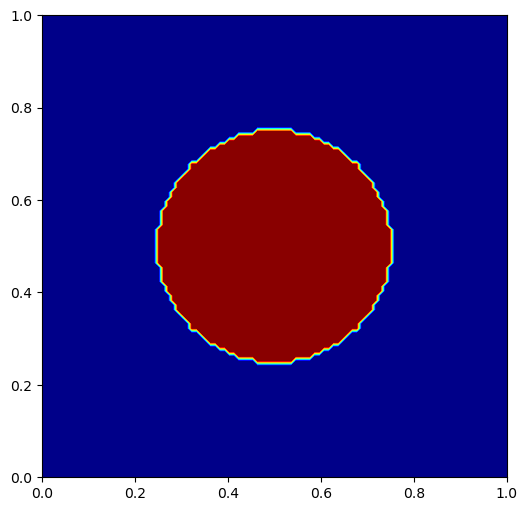

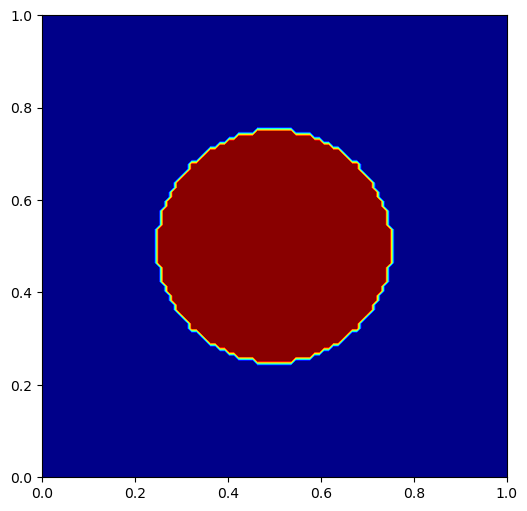

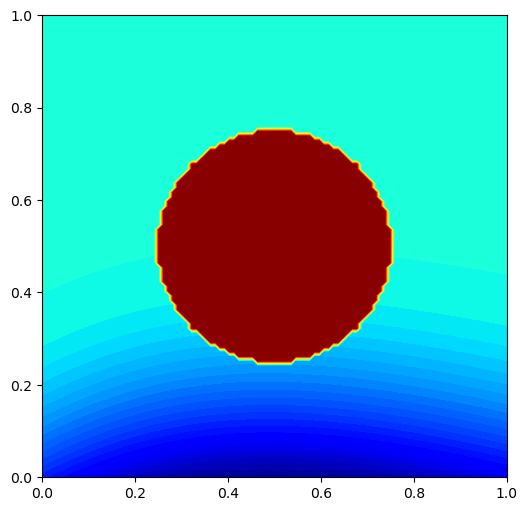

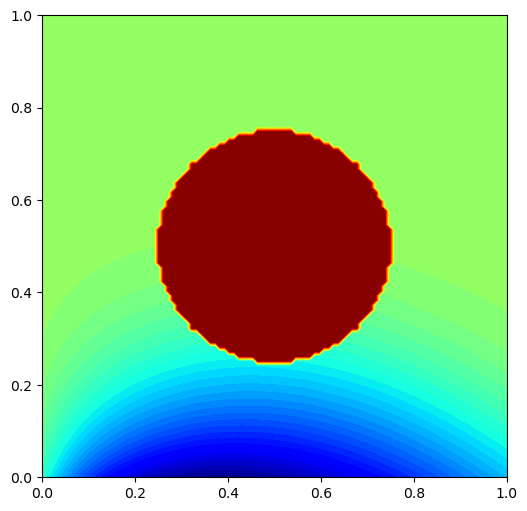

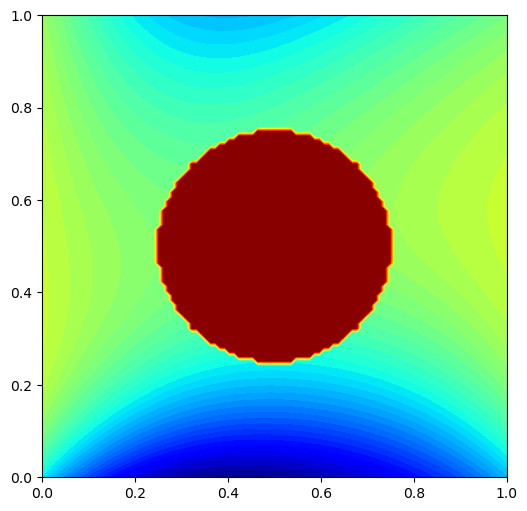

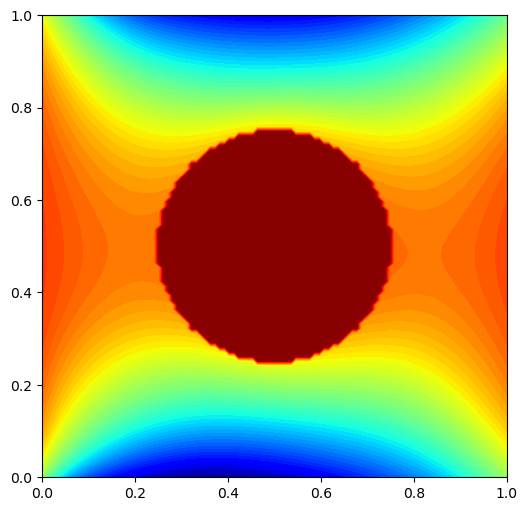

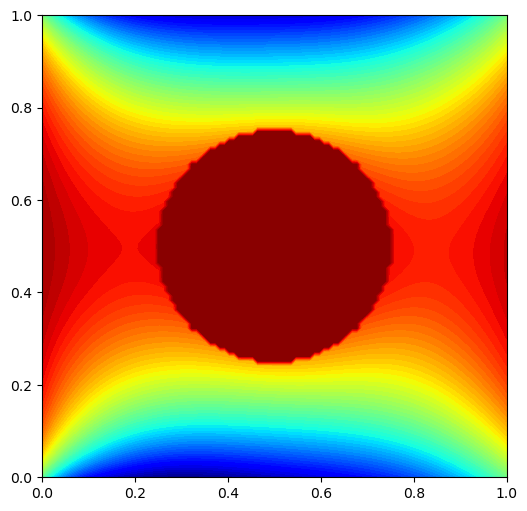

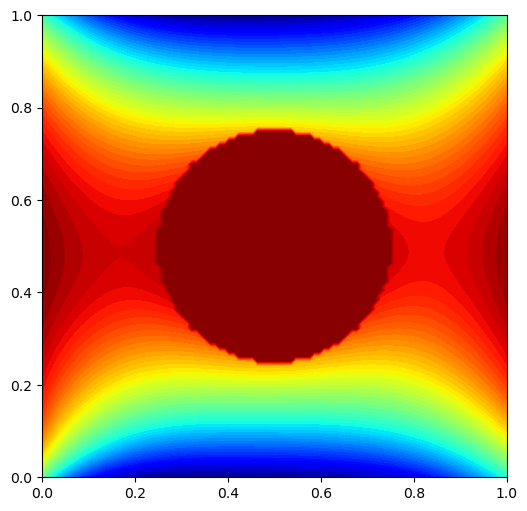

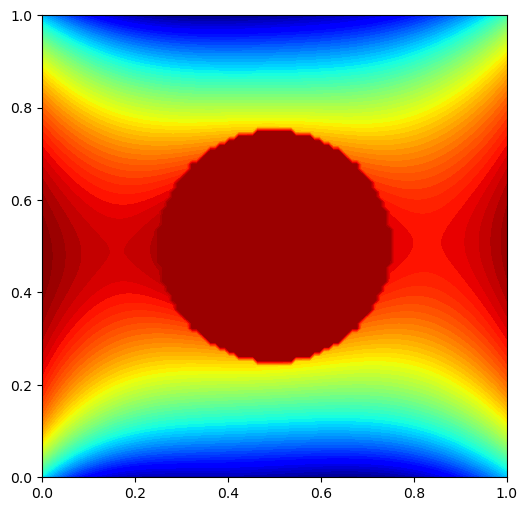

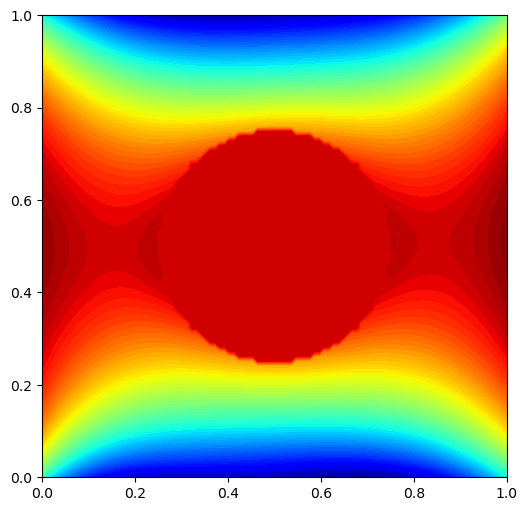

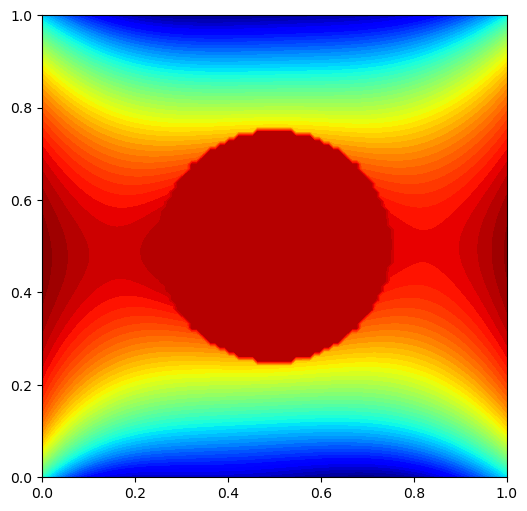

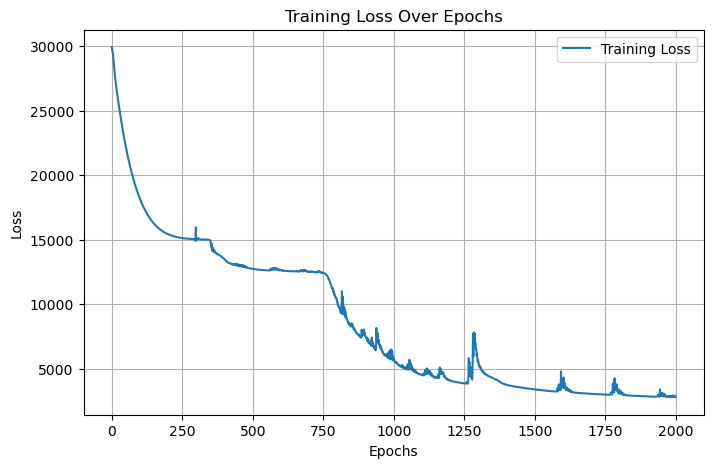

In [10]:
# Main function
def main():
    # Parameters
    Lx, Ly = 1.0, 1.0   # Domain dimensions
    Lt = 1
    Nx, Ny = 100, 100     # Number of points in x and y directions
    Nt = 11
    hidden_dim = 25     # Hidden layer size
    epochs = 2000       # Number of training epochs
    lr = 1e-2           # Learning rate

    # Generate points
    collocation_points, boundaries, time_initial = generate_points(Nx, Ny, Nt, Lx, Ly, Lt)


    # Model and Optimizer
    model = FFN(3, 1, hidden_dim)  # 3 input dimensions: x, y, time
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training Loop
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = total_loss(model, collocation_points, boundaries, time_initial)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if epoch % 200 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")
            ani = plot(model, Lx, Ly, Lt, Nx, Ny, Nt)
            display(HTML(ani.to_jshtml()))

    torch.save(model.state_dict(), "2D_Heat")

    # Final Loss Plot
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()